# Beispiel 8.5: Durchgehen eines diskontinuierlich betriebenen Rührkesselreaktors
Bearbeitet von Amke Wiesner

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 105-106. 
Die hier verwendete Nummerierung der Gleichungen entspricht der Nummerierung im Lehrbuch.

Im Beispiel werden drei verschiedene Eingangszustände, das Verhalten des Reaktors und der Verlauf der Reaktion dargestellt.
Im Reaktor läuft eine stark exotherme Reaktion ab.

# Ziel und Vorgehen
Es soll der zeitliche Verlauf von Restanteil und Temperatur für drei verschiedene Szenarien abgebildet werden.
Die Basis der Berechnung bildet die gekoppelte Betrachtung von Material- und Energiebilanz.

# Material- und Energiebilanz
Grundlage für die Materialbilanz bildet die allgemeine Materialbilanz für eine Komponente nach Glg. (8.1).

\begin{equation*}
\frac{dn_i}{dt} = V_\text{R} \sum \nu_{i,j} r_j    \tag{8.1}
\end{equation*}


Aus dieser Bilanz lässt sich ein Ausdruck für den Restanteil der Komponente 1 formulieren. Für ein konstantes Reaktionsvolumen und eine Reaktion 0. Ordnung ergibt sich für die Komponente 1 mit Glg. (8.2) und (8.4b) folgender Restanteil: 

\begin{equation*}
\frac{df_\text{1}}{dt} = \frac{- k_\text{0}}{c_\text{1,0}} \cdot exp\bigg(\frac{- E_\text{A}}{R \cdot T}\bigg)
\end{equation*}

Für die Energiebilanz ergibt sich aus Glg. (8.3) folgender Ausdruck:

\begin{equation*}
\frac{dT}{dt} = \frac{\Delta_\text{R}H}{\rho \cdot c_\text{p}} \cdot k_\text{0} \cdot exp \bigg(\frac{- E_\text{A}}{R \cdot T} \bigg) - \frac{h_\text{W}}{\rho \cdot c_\text{p}} \cdot \frac{A_\text{W}}{V_\text{R}} \cdot \bigg(T - \overline{T}_\text{K} \bigg)
\end{equation*}

# Gegebene Werte

## Allgemeine Angaben
- Reaktionsenthalpie: $\Delta_\text{R}H^{\ominus}$ = - 100 kJ / mol
- Anfangskonzentration: $c_\text{1,0}$ = 10 mol / L
- Verhältnis von Wärmeübertragungsfläche zu Reaktionsvolumen: $A_\text{W}/V_\text{R}$ = 2,4 $1/m$
- Aktivierungsenergie: $E_\text{A}$ = 100 kJ / mol
- Frequenzfaktor: $k_\text{0}$ = 10$^\text{16}$ mol / (m$^\text{3} \cdot$ s)
- Volumenspezifische Wärmekapazität: $\rho  c_\text{p}$ = 4000 kJ / (m$^3\cdot$ K)
- Adiabatische Temperaturerhöhung: $\Delta T_\text{ad}$ = 250 K
- Kühltemperatur: $\overline{T}_\text{K}$ = 292 K

## Betrachtete Szenarien

- Szenario 1: ausreichende Kühlung
    - $T_\text{0}$ = 290 K
    - $h_\text{W}$ = 200 W / (m$^2$ K)
- Szenario 2: nicht ausreichende Kühlung
    - $T_\text{0}$ = 301 K
    - $h_\text{W}$ = 200 W / (m$^2$ K)
- Szenario 3: keine Kühlung (adiabatischer Fall)
    - $T_\text{0}$ = 301 K
    - $h_\text{W}$ = 0 W / (m$^2$ K)

# Code 

Zu Beginn der Berechnung werden die benötigten Pakete importiert.
Die gekoppelten Differentialgleichungen aus Material- und Energiebilanz werden mit Hilfe des odeint-Befehls aus dem Paket *scipy* gelöst.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Die bekannten Werte aus dem Beispiel werden in Variablen angelegt.

In [2]:
Delta_R_H  = -100e3      # J/mol         Reaktionsenthalpie
rcp        = 4000e3      # J/(m³ K)      volumenspezifische Wärmekapazität
c10        = 10e3        # mol/m³        Anfangskonzentration
Delta_T_ad = 250         # K             adiabatische Temperaturerhöhung

AV         = 2.4         # 1/m           Verhältnis Wärmeübertragungsfläche/Volumen

Ea         = 100e3       # J/mol         Aktivierungsenergie
k0         = 1e16        # mol/(m³ s)    Frequenzfaktor
R          = 8.314       # J/(mol K)     universelle Gaskonstante

T_K        = 292         # K             Kühltemperatur


Um die Berechnung der Szenarien in einer Schleife durchführen zu können, werden die Werte für die verschiedenen Fälle jeweils in einem Array dargestellt. Innerhalb einer Schleife wird später der Reihe nach auf die Werte zugegriffen und so die verschiedenen Szenarien abgebildet.

In [3]:
# case       = [gekühlt 290 K, adaibatisch 301 K, gekühlt 301 K]
T_begin_case = [290, 301, 301]
h_case       = [200, 200, 0]

## Lösen der Bilanzen

Innerhalb einer while-Schleife werden die Verläufe für den Restanteil und die Temperatur berechnet und in Speichervariablen zwischengespeichert.

Zunächst wird der betrachtete Zeitbereich festgelegt.

In [4]:
n = 1001                   # Zeitschritte
t = np.linspace(0,100,n)   # Zeit in h

Nun werden die Speichervariablen angelegt. Sie enthalten drei Elemente, da hier drei verschiedene Fälle betrachtet werden.

In [5]:
f_save = [0,0,0]    # Speichervariable Restanteil
T_save = [0,0,0]    # Speichervariable Temperatur in K
t_save = [0,0,0]    # Speichervariable Zeit in h

Nun wird eine while-Schleife zur Lösung der gekoppelten Bilanzgleichungen für die drei betrachteten Fälle aufgebaut. Die Bilanzen werden in der Funktion *balance* angelegt, die eine if-Verzweigung enthält. Durch die Verzweigung wird verhindert, dass der Restanteil Werte kleiner als 0 annimmt.

In [6]:
counter = 0

while counter < len(T_begin_case):
    
    T_begin = T_begin_case[counter]
    
    
    def balance (y, t):
        f, T = y
        
        if f>=0:
            dfdt = - 3600 * k0 /c10 * np.exp(- Ea / (R * T))
            dTdt = - Delta_R_H / rcp * 3600 * k0 * np.exp(- Ea / (R * T)) - 3600 * h_case[counter] /rcp * AV * (T - T_K)
            
        else:
            dfdt = 0
            dTdt = 0
            
        return dfdt, dTdt
    
    # Startwerte
    y0 = [1.0, T_begin]
    
    # Lösen
    solve = odeint(balance, y0, t)
    f, T = solve.T
    
    # Speichern
    f_save[counter] = f
    T_save[counter] = T
    t_save[counter] = t
    
    counter = counter + 1

## Anpassen der Funktionen

Im nächsten Codeblock werden die soeben berechneten zeitlichen Verläufe gekürzt. Sobald der Restanteil den Wert 0 annimmt, ist das Edukt vollständig verbraucht und die Reaktion stoppt. Diese Unstetigkeit soll korrekt in der Grafik dargestellt werden.

In [7]:
f_save_new = [0,0,0]
T_save_new = [0,0,0]
t_save_new = [0,0,0]

counter = 0
while counter < len(T_begin_case):
    
    diff = np.gradient(f_save[counter])     # bildet die Differenz zwischen zwei Einträgen
    position = np.argwhere(diff == 0)       # findet die Indizes, an denen die Bedingung erfüllt ist
    
    f_save_new[counter] = np.delete(f_save[counter], position)
    T_save_new[counter] = np.delete(T_save[counter], position)
    t_save_new[counter] = np.delete(t_save[counter], position)
    
    counter = counter + 1

## Grafische Darstellung

Zunächst wird im folgenden Block der äußere Aufbau der Grafik angelegt. Die Funktionen werden mithilfe einer while-Schleife in der Grafik abgebildet.

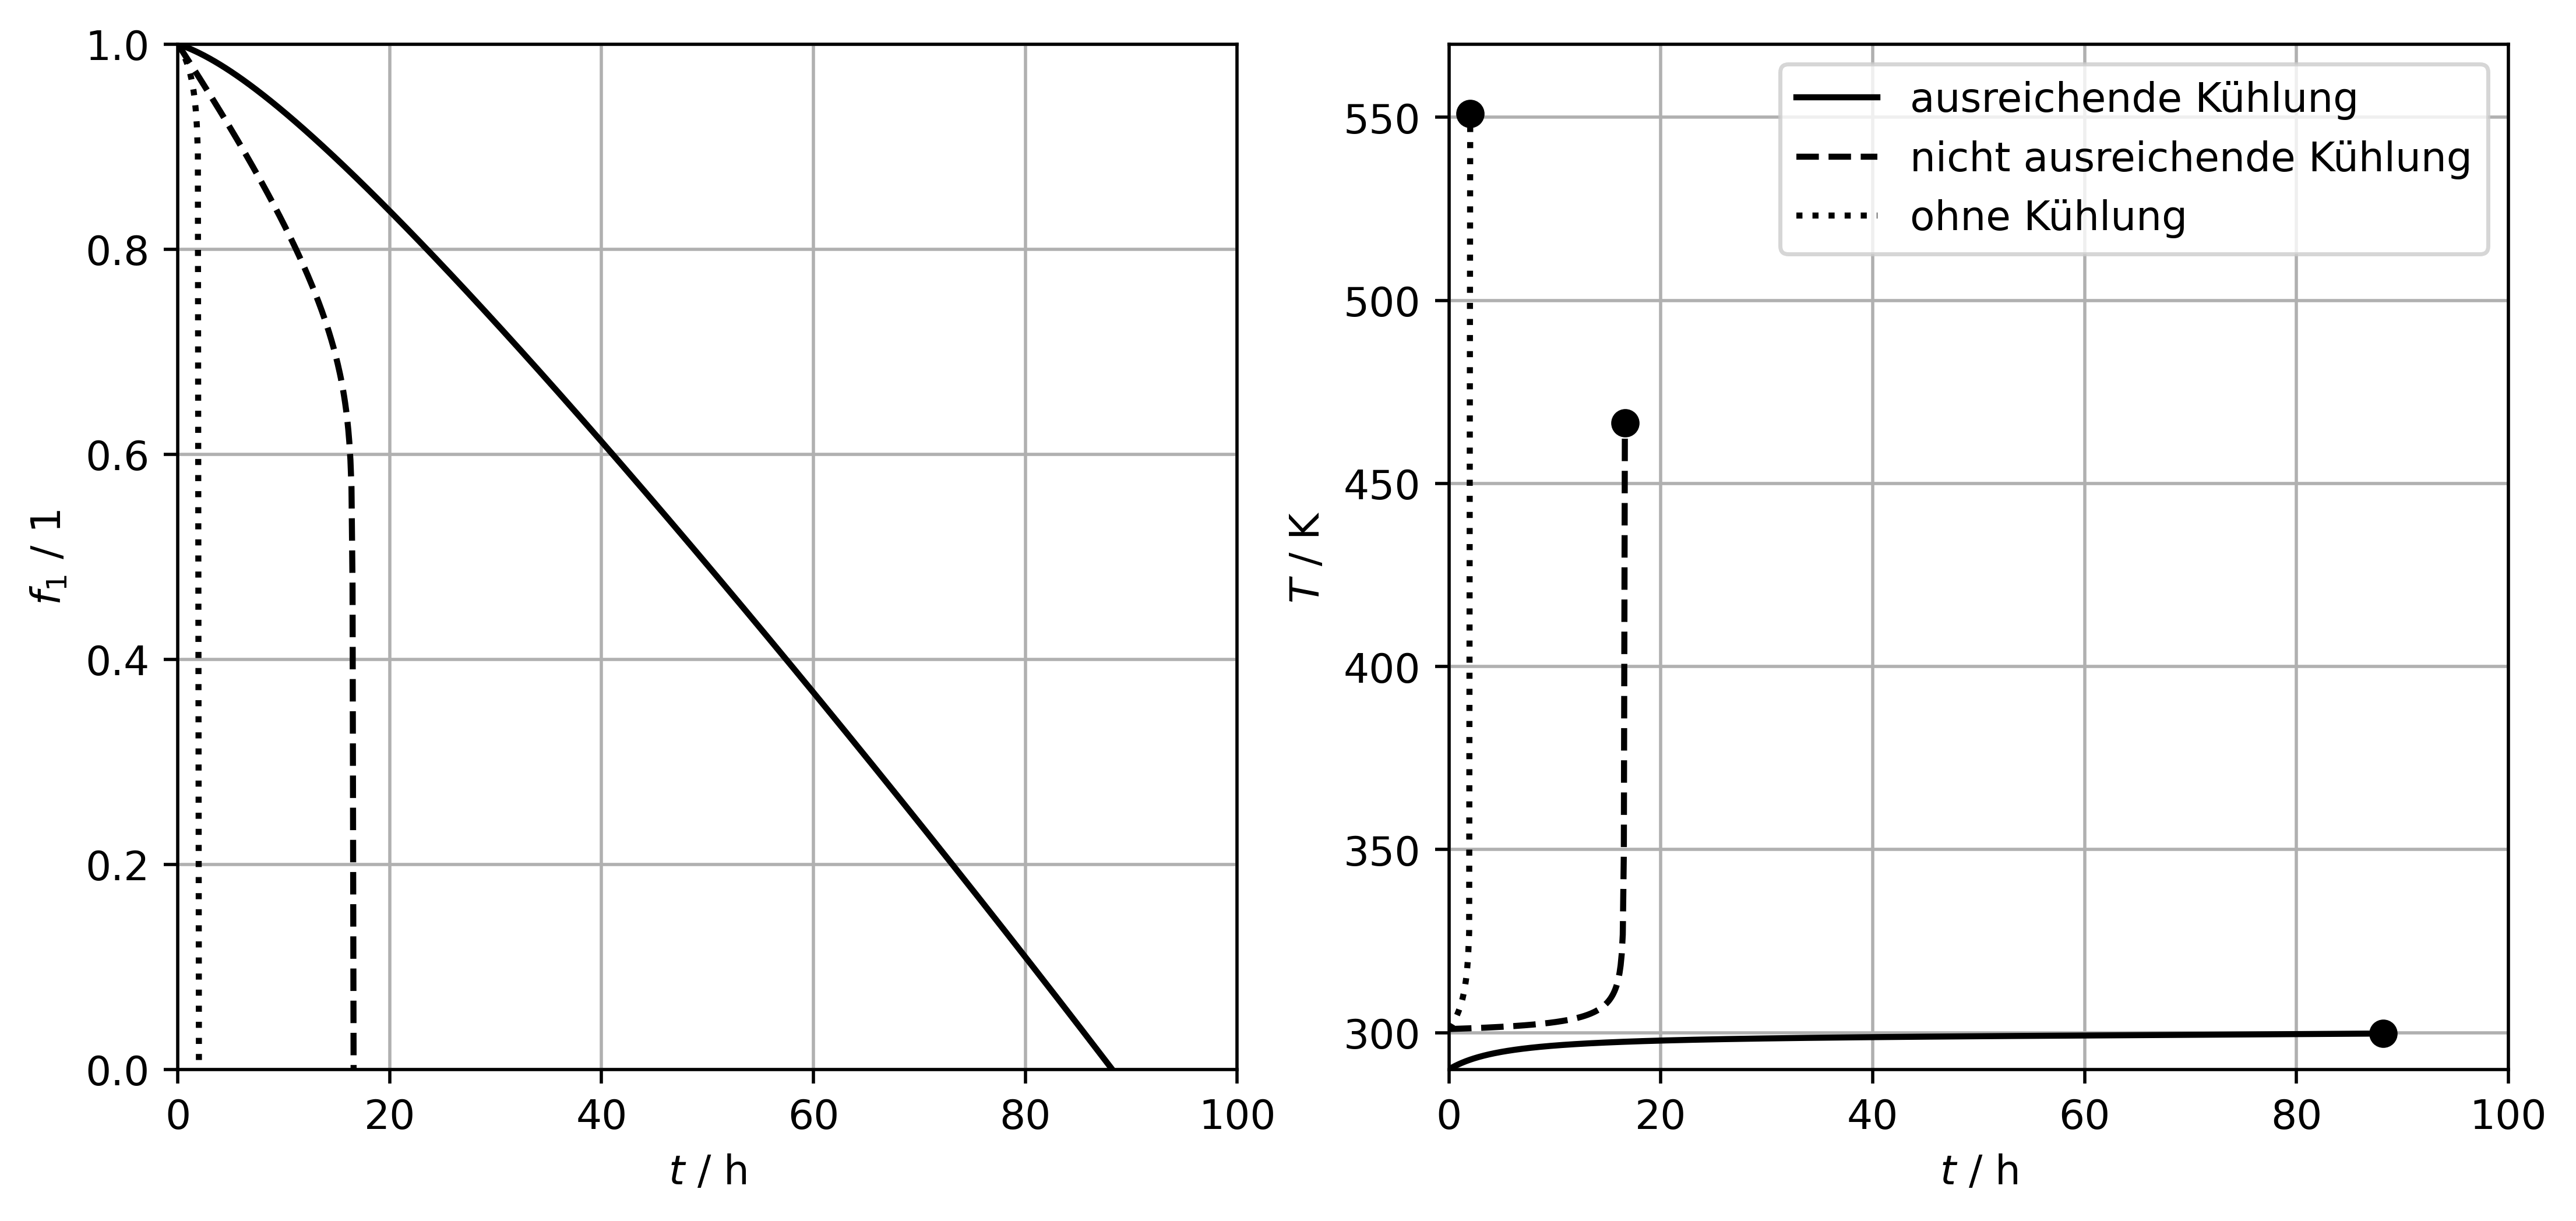

In [8]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (8,4), dpi = 500)

label = ['ausreichende Kühlung', 'nicht ausreichende Kühlung', 'ohne Kühlung']
linestyle = ['solid', 'dashed', 'dotted']

ax1.set_xlabel('$t$ / h')
ax1.set_ylabel('$f_1$ / 1')
ax1.set_xlim(0,100)
ax1.set_ylim(0,1)

ax1.grid(True)


ax2.set_xlabel('$t$ / h')
ax2.set_ylabel('$T$ / K')
ax2.set_xlim(0,100)
ax2.set_ylim(290, 570)

ax2.grid(True)

counter = 0
while counter < len(T_begin_case):
        
    ax1.plot(t_save_new[counter], f_save_new[counter], label = label[counter], linestyle = linestyle[counter], color = 'black')
    ax2.plot(t_save_new[counter], T_save_new[counter], label = label[counter], linestyle = linestyle[counter], color = 'black')
    
    t_save_dot = t_save_new[counter]
    T_save_dot = T_save_new[counter]
    ax2.plot(t_save_dot[len(t_save_dot)-1], T_save_dot[len(T_save_dot)-1], 'o', color = 'black')
    
    counter = counter + 1
    
#ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
plt.subplots_adjust(5, 0, 6)    # positioniert die Plots weiter auseinander
plt.show()

Im Fall ohne Kühlung ist das Ende der Reaktion nach 2 h erreicht. Zudem steigt die Temperatur sehr schnell an, bis die adiabatische Temperaturerhöhung von $\Delta T_{ad}$ = 250 K erreicht ist.

Im Falle nicht ausreichender Kühlung verläuft die Reaktion langsamer und das Edukt ist nach 16 h verbraucht. Nach einer Induktinsphase steigt die Temperatur auch hier sehr schnell an und nimmt immernoch 167 K zu.

Mit ausreichender Kühlung stellt sich eine quasistationäre Temperatur bei $T$ = 300 K ein und die Reaktion verläuft kontrolliert bis zur vollständigen Umsetzung des Eduktes nach 87 h.